# ELL715 Assignment 2

- Aditya Singh (2020EE10461)
- Harsh Swaika (2021EE11052)
- Ananya M (2020MT10787)
- Pramod Prasad (2022BSZ8403)
- Sarthak Srivastava (2020EE10550)
> In this assignment, you'll get to play with two special tools: one that finds the edges of things and another that spots shapes. Grab a picture with lots of geometric shapes, like a painting with lines, circles, triangles, ellipse etc. and find these shapes. Actually I want you to implement canny edge algorithm and hough transform once you find edges.
>
> 1. Demonstrate the detection of shapes in the image of your choice
> 2. Numerous built-in functions are at your disposal (check Google) for various geometrical shapes. Your task is to discover a new geometrical figure (you can design your own)* and write the Hough transform for it.
> 3. Also extend your search in 3-dimension.


# Part 1: Canny Edge Detector
Implemented from scratch

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
# import math

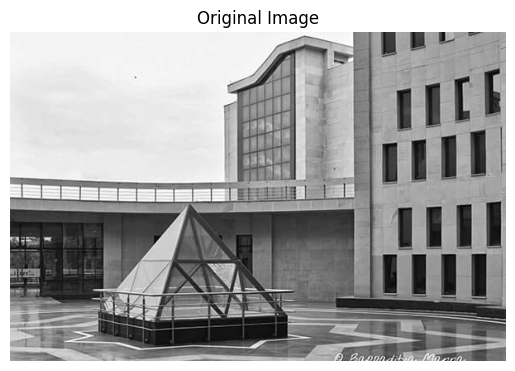

In [2]:
dog=cv2.imread(r"lhc.jpg")
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)

#display the original image
plt.imshow(dog, cmap='gray') 
plt.title('Original Image')
plt.axis('off')
plt.show()

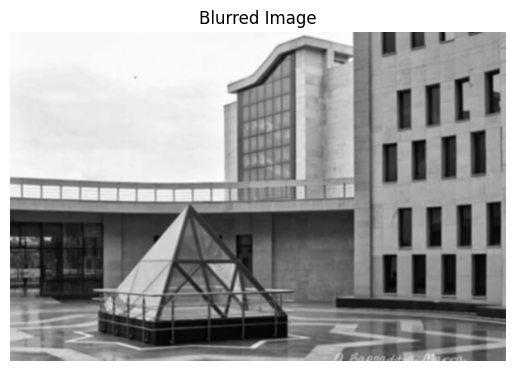

In [3]:
blur = cv2.GaussianBlur(dog,(5,5),0) #Applying a Gaussian blur to remove Noise

plt.imshow(blur, cmap='gray') 
plt.title('Blurred Image')
plt.axis('off')
plt.show()

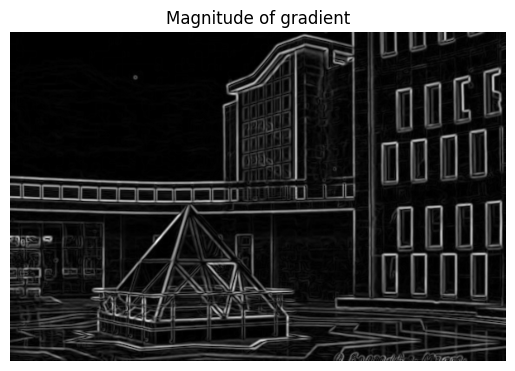

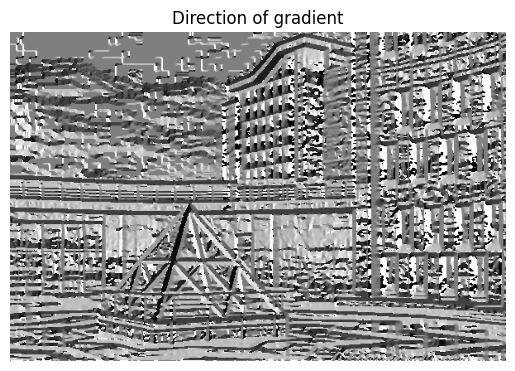

In [4]:
# Compute gradients using Scharr filter which performs better than Sobel filter for gradient computation
gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=-1) 
gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=-1)

# Calculate gradient magnitude and direction in the image
mag = np.sqrt(gx**2 + gy**2)
dir = np.arctan2(gy, gx)

plt.imshow(mag, cmap='gray') 
plt.title('Magnitude of gradient')
plt.axis('off')
plt.show()

plt.imshow(dir, cmap='gray') 
plt.title('Direction of gradient')
plt.axis('off')
plt.show()

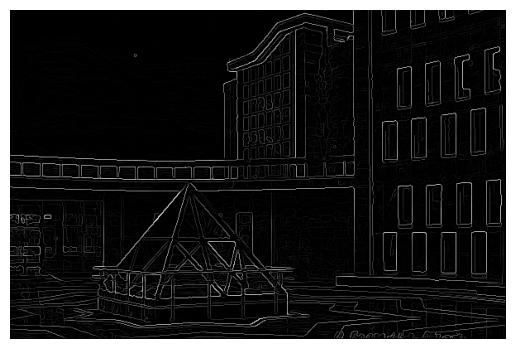

In [5]:
sup = np.zeros(mag.shape)
for i in range(mag.shape[0]-1):
    for j in range(mag.shape[1]-1):
        a = dir[i, j]
        #edge direction angle is rounded to one of four angles representing vertical, horizontal, and the two diagonals
        if (a <= np.pi/8 and a > -np.pi/8) or (a > np.pi*7/8 or a <= -np.pi*7/8):
            neighbor_pixels = [mag[i, j-1], mag[i, j+1]]
        elif (a > np.pi*3/8 and a <= np.pi*5/8) or (a <= -np.pi*3/8 and a > -np.pi*5/8):
            neighbor_pixels = [mag[i-1, j], mag[i+1, j]]
        elif (a > np.pi/8 and a <= np.pi*3/8) or (a <= -np.pi*5/8 and a > -np.pi*7/8):
            neighbor_pixels = [mag[i-1, j-1], mag[i+1, j+1]]
        else:
            neighbor_pixels = [mag[i+1, j-1], mag[i-1, j+1]]
        if mag[i, j] >= max(neighbor_pixels):
            sup[i, j] = mag[i, j]

plt.imshow(sup, cmap='gray') 
plt.axis('off')
plt.show()

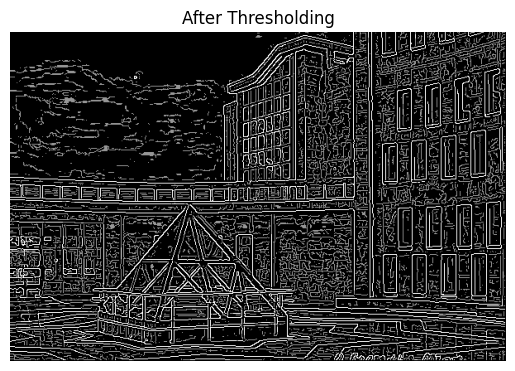

In [6]:
ht=0.18
lt=0.08

final = np.zeros(sup.shape)
ht = np.max(sup)*ht
lt = ht*lt
strong_i, strong_j = np.where(sup >= ht)
weak_i, weak_j = np.where((sup >= lt) & (sup < ht))
final[strong_i, strong_j] = 255  #Strong edges are assigned max intensity
final[weak_i, weak_j] = 150   #Weaker edges are assigned lesser intensity as compared to the strong edges

plt.imshow(final, cmap='gray') 
plt.title('After Thresholding')
plt.axis('off')
plt.show()

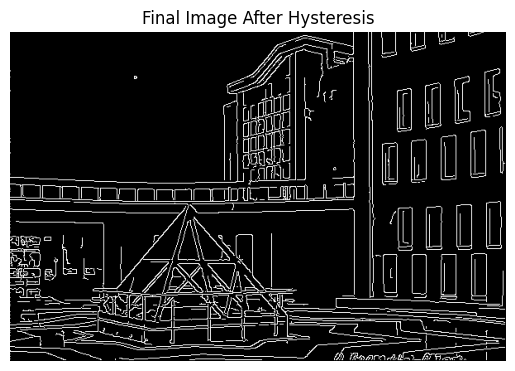

In [7]:
#Checking connectivity of weak edges,i.e, if they are surrounded by any strong edge pixels then they are also 
#an edge else make its intensity zero
for i in range(1, final.shape[0]-1):
    for j in range(1, final.shape[1]-1):
        if (final[i,j] == 150):
            if ((final[i+1, j-1] == 255) or (final[i+1, j] == 255) or (final[i+1, j+1] == 255)
                or (final[i, j-1] == 255) or (final[i, j+1] == 255)
                or (final[i-1, j-1] == 255) or (final[i-1, j] == 255) or (final[i-1, j+1] == 255)):
                final[i, j] = 255
            else:
                final[i, j] = 0

plt.imshow(final, cmap='gray') 
plt.title('Final Image After Hysteresis')
plt.axis('off')
plt.show()

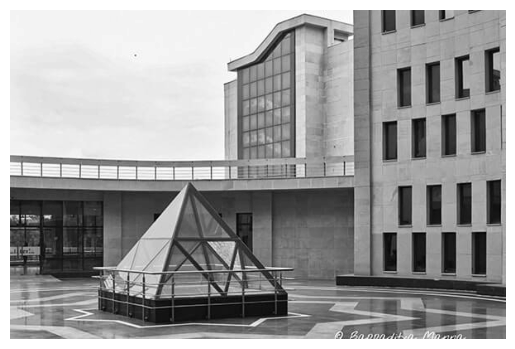

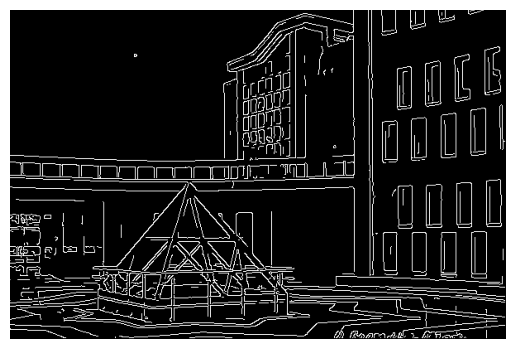

In [8]:
def canny_edge_detection(image, lt, ht):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and smoothen the image
    filimg = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Compute gradients using Scharr filter which performs better than Sobel filter for gradient computation
    gx = cv2.Sobel(filimg, cv2.CV_64F, 1, 0, ksize=-1)
    gy = cv2.Sobel(filimg, cv2.CV_64F, 0, 1, ksize=-1)
    
    # Calculate gradient magnitude and direction in the image
    mag = np.sqrt(gx**2 + gy**2)
    dir = np.arctan2(gy, gx)
    
    # Classification of gradients in the fixed directions
    sup = np.zeros(mag.shape)
    for i in range(mag.shape[0]-1):
        for j in range(mag.shape[1]-1):
            a = dir[i, j]
            
            if (a <= np.pi/8 and a > -np.pi/8) or (a > np.pi*7/8 or a <= -np.pi*7/8):
                neighbor_pixels = [mag[i, j-1], mag[i, j+1]]
            elif (a > np.pi*3/8 and a <= np.pi*5/8) or (a <= -np.pi*3/8 and a > -np.pi*5/8):
                neighbor_pixels = [mag[i-1, j], mag[i+1, j]]
            elif (a > np.pi/8 and a <= np.pi*3/8) or (a <= -np.pi*5/8 and a > -np.pi*7/8):
                neighbor_pixels = [mag[i-1, j-1], mag[i+1, j+1]]
            else:
                neighbor_pixels = [mag[i+1, j-1], mag[i-1, j+1]]
            if mag[i, j] >= max(neighbor_pixels):
                sup[i, j] = mag[i, j]
    
    # Thresholding
    final = np.zeros(sup.shape)
    ht = np.max(sup)*ht
    lt = ht*lt
    strong_i, strong_j = np.where(sup >= ht)
    weak_i, weak_j = np.where((sup >= lt) & (sup < ht))
    final[strong_i, strong_j] = 255  #Strong edges are assigned max intensity
    final[weak_i, weak_j] = 150   #Weaker edges are assigned lesser intensity as compared to the strong edges

    for i in range(1, final.shape[0]-1):
        for j in range(1, final.shape[1]-1):
            if (final[i,j] == 150):
                if ((final[i+1, j-1] == 255) or (final[i+1, j] == 255) or (final[i+1, j+1] == 255)
                    or (final[i, j-1] == 255) or (final[i, j+1] == 255)
                    or (final[i-1, j-1] == 255) or (final[i-1, j] == 255) or (final[i-1, j+1] == 255)):
                    final[i, j] = 255
                else:
                    final[i, j] = 0
    
    return final

image = r'lhc.jpg'
i = cv2.imread(image)
dog = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

#The final threshold values are empirically determined and depends on a case to case basis per image
final = canny_edge_detection(i, lt=0.8, ht=0.18)

plt.imshow(dog, cmap='gray')
plt.axis('off')
plt.show()
 
plt.imshow(final, cmap='gray') 
plt.axis('off')
plt.show()

# Part 2: Hough Transform

## Geometric Equations
### Line (2 parameter r, $\theta$)
$x \cos \theta + y \sin \theta = r$

### Circle (3 parameter a, b, r)
$(x-a)^2 + (y-b)^2 = r^2$

### Equal Hyperbola (3 parameter a, b, r)
$(x-a)^2 - (y-b)^2 = r^2$

In [16]:
def inv_line (point, theta):
    x1, y1 = point
    return x1*np.cos(theta) + y1*np.sin(theta)
def inv_circle (point, a, b):
    x, y = point
    return np.sqrt(np.square(x-a) + np.square(y-b))
def inv_hyperbola(point, a, b):
    x, y = point
    return np.sqrt(np.square(x-a) - np.square(y-b))

## Transforming each point to Hough space
We calculate the geometric parameter for uniformly sampled points in the parameter search space

In [17]:
def hough_point_transform(point, func, params, dim=2):
    a = np.linspace(params['a_min'], params['a_max'], params['num_points_a'])
    if dim == 2:
        b = func(point, a)
        points = np.stack((a, b), axis=-1)
    if dim == 3:
        b = np.linspace(params['b_min'], params['b_max'], params['num_points_b'])
        c = func(point, a, b)
        points = np.stack((a, b, c), axis=-1)
    return points

## Transforming the image
We transform each point which is at maxima/is an edge, and compute the tranform for it

In [18]:
def hough_transform(
    img, 
    func,
    dim=2,
    a_min=0, 
    a_max=10, 
    num_points_a=100,
    b_min=0, 
    b_max=10, 
    num_points_b=100
):
    assert(dim == 2 or dim == 3)
    params = {
        'a_min':a_min, 
        'a_max':a_max, 
        'num_points_a':num_points_a,
        'b_min':b_min, 
        'b_max':b_max, 
        'num_points_b':num_points_b,
    }
    
    max_intensity = np.max(img)
    row, column = np.where(img == max_intensity)
    edge_points = np.stack((row, column), axis=-1)
    
    transform = np.empty((0, dim))
    for xy in edge_points:
        points = hough_point_transform(xy, func, params, dim)
        transform = np.concatenate((transform, points))
    transform = np.clip(transform, a_min=-1e4, a_max=1e4)
    
    return transform

## Sample Image
Equations used to generate using [Desmos](https://www.desmos.com/calculator/hvla2oqcmd):

$x^{2\ }-\ y^{2}=\ 1$
 
$x\cdot0.5\cos2.5+y\cdot0.5\sin2.5=1$
 
$x\cdot1.5\cos1+y\cdot1.5\sin1=1$
 
$x^{2\ }-\ y^{2}=\ 8$
 
$x^{2}+y^{2}=5$
 
$\left(x-3\right)^{2}+\left(y-2\right)^{2}=1$

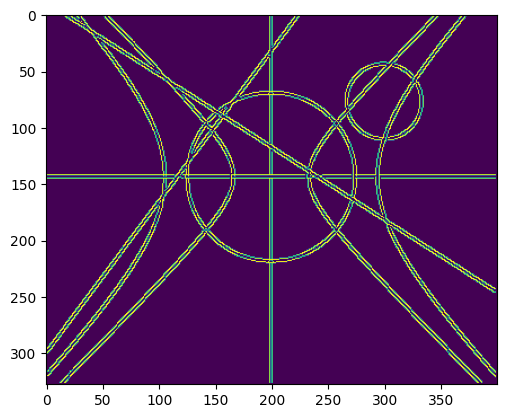

In [23]:
img = cv2.imread(r'sample_small.png')
img = canny_edge_detection(img, lt=0.8, ht=0.18)
plt.imshow(img)

In [24]:
line = hough_transform(img, inv_line, a_min=0, a_max=4, num_points_a=100)

In [42]:
circle = hough_transform(img, inv_circle, dim=3, a_min=0, a_max=1000, num_points_a=400, b_min=0, b_max=1000, num_points_b=400)

In [57]:
hyper = hough_transform(img, inv_hyperbola, dim=3, a_min=0, a_max=1000, num_points_a=400, b_min=0, b_max=1000, num_points_b=400)

/var/folders/v_/7h9hf8f91m9cxmhg0xrmbstr0000gn/T/ipykernel_95209/1419837765.py:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.square(x-a) - np.square(y-b))


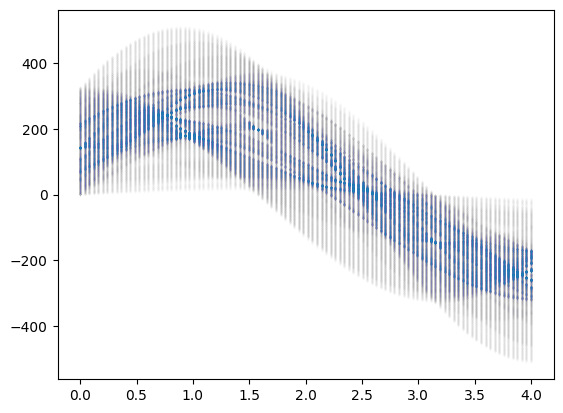

In [37]:
plt.scatter(line[:, 0], line[:, 1], s = 0.005, alpha=0.02)

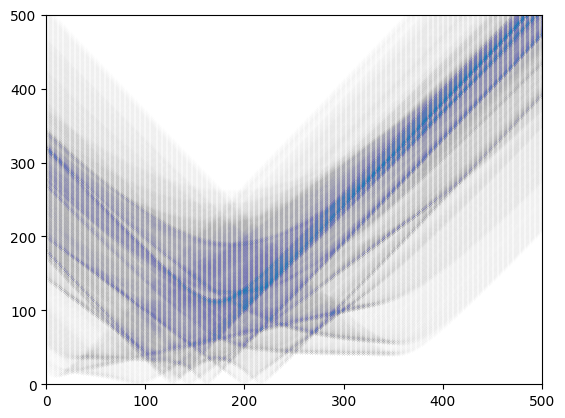

In [63]:
# Plotting a vs r for circle
plt.xlim([0,500])
plt.ylim([0,500])
plt.scatter(circle[:, 0], circle[:, 2], s = 0.005, alpha=0.02)

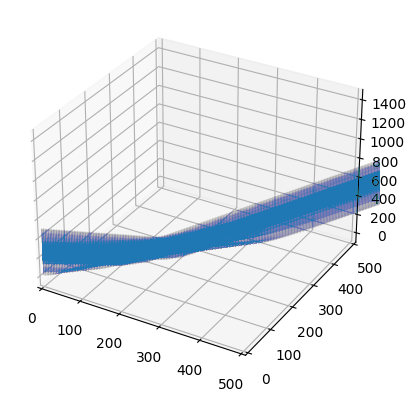

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(circle[:, 0], circle[:, 1], circle[:, 2], s = 0.005, alpha=0.02)
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.show()

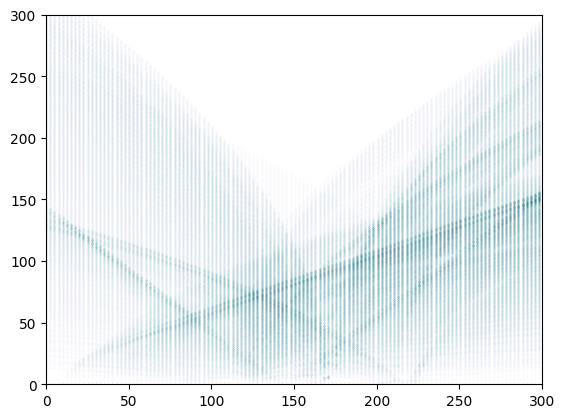

In [66]:
# Plotting a vs r for hyperbola

plt.xlim([0,300])
plt.ylim([0,300])
plt.scatter(hyper[:, 0], hyper[:, 2], s = 0.01, alpha=0.05)

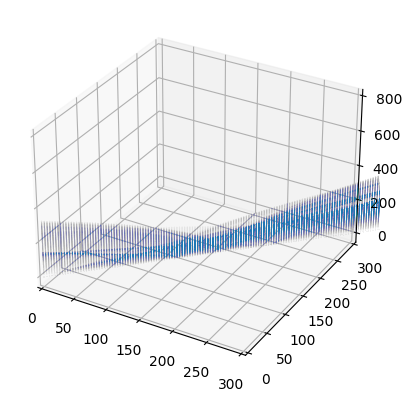

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(hyper[:, 0], hyper[:, 1], hyper[:, 2], s = 0.005, alpha=0.02)
plt.xlim([0, 300])
plt.ylim([0, 300])
plt.show()

## Conclusion
In the screenshot of the desmos image, we have made it smaller around 400x328 pixels. We have obtained the parametric space representation using the Hough Transform for each

- In the line transform, we have the angles at pi, pi/2 for the grid lines and 1 and 2.5 radians for the drawn lines and the rest due to the hyperbolic lines 
- In the plots, we observe the centers (origin) around 200 pixel due to scaling
- In the circle transform, we can see an intersection for the main circle around 140px center, and 70px radius region, and also some around the 35px radius region
- In the circle transform, we also see curvy regions corresponding to the Hyperbola parts
- In the hyperbola transform, we can see intersections around 80 center 50 radius, 139 center 70 radius, and 170 center 30 radius.